In [1]:
import imageio as iio
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt


!wget https://upload.wikimedia.org/wikipedia/commons/d/dd/Forest-House.jpg

--2022-01-28 13:00:36--  https://upload.wikimedia.org/wikipedia/commons/d/dd/Forest-House.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 246534 (241K) [image/jpeg]
Saving to: ‘Forest-House.jpg.3’

Forest-House.jpg.3  100%[===================>] 240.76K  --.-KB/s    in 0.04s   

2022-01-28 13:00:36 (5.23 MB/s) - ‘Forest-House.jpg.3’ saved [246534/246534]



In [2]:
im = iio.imread("Forest-House.jpg")
im = np.array(im)
im=np.sum(im,axis=2)/3
im.shape

(436, 658)

In [3]:
#compress the image by clustering in N regions
np.unique(im).shape

(766,)

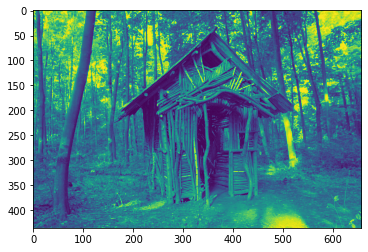

In [4]:
plt.imshow(im)

[ 73.67594796 124.95797461  26.07890136 205.04643765]


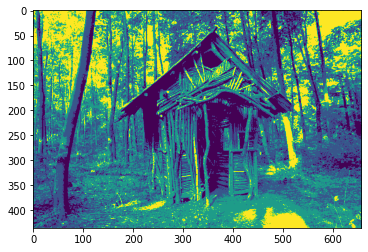

In [9]:
N=4

center=np.random.randint(0,255,N)

for i in range(5):
  center=center[np.newaxis,np.newaxis,:]
  diff=(im[:,:,np.newaxis]-center)**2
  arg=np.argmin(diff,axis=2)
  new_center=[]
  for num in np.unique(arg):
    t=im*(arg==num)
    new_center.append(np.sum(t)/np.sum(arg==num))
  center=np.array(new_center)

print(center)
cent=center[np.newaxis,np.newaxis,:]
diff=(im[:,:,np.newaxis]-cent)**2
arg=np.argmin(diff,axis=2)
new_im=center[arg]
plt.imshow(new_im)

In [10]:
from sklearn import cluster

In [11]:
im=im.reshape(436, 658, 1)
print(im.shape)
im=im.reshape(-1,1)
print(im.shape)

(436, 658, 1)
(286888, 1)


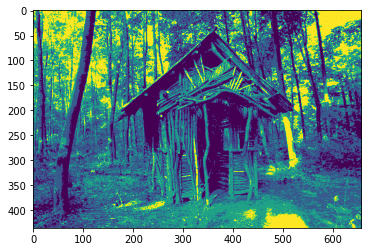

In [12]:
N=4
kmeans=cluster.KMeans(n_clusters=N)
kmeans.fit(im)

out=kmeans.predict(im)
clus_center=kmeans.cluster_centers_

im_new = clus_center[out]
plt.imshow(im_new.reshape(436,658))